### 数据标准化处理 & 离散化处理
离散化的关键点：要根据数据特点与建模需求选择最合适的离散化方式，毕竟离散化的合理性会直接影响后续的建模与应用效果

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [10]:
data = np.loadtxt('..\dataset\data6.txt', delimiter='\t')
# data[:3]

# Z-Score标准化处理, 使用preprocessing.StandardScaler()既能一次性满足对数据的标准化处理，又能将数据集的特征保存下来
zscore_scaler = preprocessing.StandardScaler()
data_scale_1 = zscore_scaler.fit_transform(data)

# Min-Max标准化处理, 将数据落入[0, 1]区间
minmax_scaler = preprocessing.MinMaxScaler()
data_scale_2 = minmax_scaler.fit_transform(data)

# MaxAbsScale标准化处理, 将数据落入到[-1, 1]区间内
maxabs_scaler = preprocessing.MaxAbsScaler()
data_scale_3 = maxabs_scaler.fit_transform(data)

# 使用RobustScaler标准化处理，处理离群点的数据
robust_scaler = preprocessing.RobustScaler()
data_scale_4 = robust_scaler.fit_transform(data)

Text(0.5, 0.98, 'raw data and standardized data')

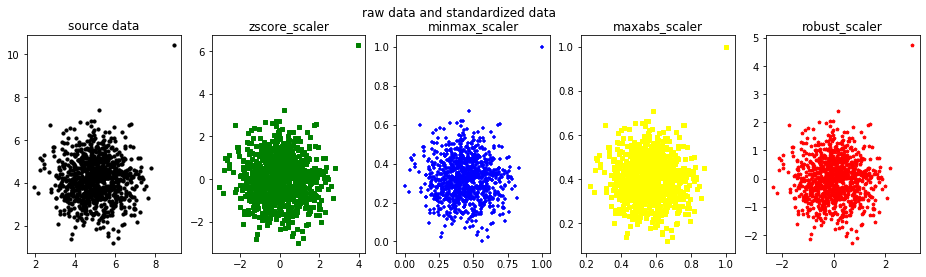

In [15]:
##### 原始数据及处理后的数据展示
data_list = [data, data_scale_1, data_scale_2, data_scale_3, data_scale_4]
color_list = ['black', 'green', 'blue', 'yellow', 'red']
merker_list = ['o', ',', '+', 's', 'p']
title_list = ['source data', 'zscore_scaler', 'minmax_scaler', 'maxabs_scaler', 'robust_scaler']
plt.figure(figsize=(16, 4))
for i, data_single in enumerate(data_list):    # 循环得到索引和每个数值
    plt.subplot(1, 5, i + 1)    # 确定子网格
    plt.scatter(data_single[:, :-1], data_single[:, -1], s=10, marker=merker_list[i], c=color_list[i])    # 子网格展示散点图
    plt.title(title_list[i])    # 设置子网格标题
plt.suptitle('raw data and standardized data')    # 设置总标题

#### 离散化处理

In [27]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import preprocessing

df = pd.read_table('..\dataset\data7.txt', names = ['id', 'amount', 'income', 'datetime', 'age'])
df.head()

,id,amount,income,datetime,age
0,15093,1390,10.40,2017-04-30 19:24:13,0-10
1,15062,4024,4.68,2017-04-27 22:44:59,70-80
2,15028,6359,3.84,2017-04-27 10:07:55,40-50
3,15012,7759,3.70,2017-04-04 07:28:18,30-40
4,15021,331,4.25,2017-04-08 11:14:00,70-80


In [28]:
# 时间数据离散化
df['datetime'] = list(map(pd.to_datetime, df['datetime'])) 
df['datetime'] = [i.weekday() for i in df['datetime']]    # 将日期离散化周几

# 将多值离散数据进行离散化处理
map_df = pd.DataFrame(
    [['0-10', '0-40'], ['10-20', '0-40'], ['20-30', '0-40'], ['30-40', '0-40'], ['40-50', '40-80'],
     ['50-60', '40-80'], ['60-70', '40-80'], ['70-80', '40-80'], ['80-90', '>80'], ['>90', '>80']],
    columns=['age', 'age2'])     # 定义一个要转换的新区间
df_tmp = df.merge(map_df, left_on='age', right_on='age', how='inner')
df = df_tmp.drop('age', 1)
df.head()

,id,amount,income,datetime,age2
0,15093,1390,10.40,6,0-40
1,15064,7952,4.40,0,0-40
2,15080,503,5.72,5,0-40
3,15068,1668,3.19,5,0-40
4,15019,6710,3.20,0,0-40


In [43]:
# 分箱区间实现离散化
bins = [0, 200, 1000, 5000, 10000]
df['amount1'] = pd.cut(df['amount'], bins)

# 使用聚类方法实现离散化
df_data = df['amount']    # 获取要聚类的数据，列为amount
df_data_reshape = df_data.values.reshape((df_data.shape[0], 1))    # 转换数据形状
model_kmeans = KMeans(n_clusters=4, random_state=0)    # 创建KMeans模型并指定聚类数量
kmeans_result = model_kmeans.fit_predict(df_data_reshape)
df['amount2'] = kmeans_result

df.head()

,id,amount,income,datetime,age2,amount1,amount2
0,15093,1390,10.40,6,0-40,"(1000, 5000]",1
1,15064,7952,4.40,0,0-40,"(5000, 10000]",0
2,15080,503,5.72,5,0-40,"(200, 1000]",1
3,15068,1668,3.19,5,0-40,"(1000, 5000]",1
4,15019,6710,3.20,0,0-40,"(5000, 10000]",0


In [44]:
# 使用四分位数实现离散化
df['amount3'] = pd.qcut(df['amount'], 4, labels=['bad', 'medium', 'good', 'awesome'])
df.head()

,id,amount,income,datetime,age2,amount1,amount2,amount3
0,15093,1390,10.40,6,0-40,"(1000, 5000]",1,bad
1,15064,7952,4.40,0,0-40,"(5000, 10000]",0,awesome
2,15080,503,5.72,5,0-40,"(200, 1000]",1,bad
3,15068,1668,3.19,5,0-40,"(1000, 5000]",1,bad
4,15019,6710,3.20,0,0-40,"(5000, 10000]",0,awesome


In [46]:
# 做特征二值化处理
binarizer_scaler = preprocessing.Binarizer(threshold=df['income'].mean())
income_tmp = binarizer_scaler.fit_transform(df[['income']])
income_tmp.resize(df['income'].shape)
df['income1'] = income_tmp
df.head()

,id,amount,income,datetime,age2,amount1,amount2,amount3,income1
0,15093,1390,10.40,6,0-40,"(1000, 5000]",1,bad,1.0
1,15064,7952,4.40,0,0-40,"(5000, 10000]",0,awesome,1.0
2,15080,503,5.72,5,0-40,"(200, 1000]",1,bad,1.0
3,15068,1668,3.19,5,0-40,"(1000, 5000]",1,bad,0.0
4,15019,6710,3.20,0,0-40,"(5000, 10000]",0,awesome,0.0
